<a href="https://colab.research.google.com/github/Vishesh2001/letsgrowmore_internship_task2/blob/main/Prediction_using_decision_tree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Letsgrowmore- Decision tree algorithm.
Vishesh Kumar


1. importing all necessary libraries.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

2. importing dataset and exploratory data analysis.

In [8]:
data=pd.read_csv("/content/Iris.csv")
data.head(10)



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


checking for data clearing required or not.

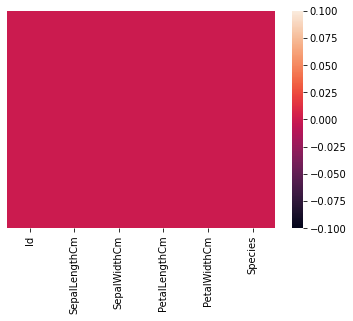

In [18]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = True)

since there is no colorspot anywhere, we can conclude that there is no null values present.
now we will set our id coulmn as index. 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


plotting data for visualization(EDA)


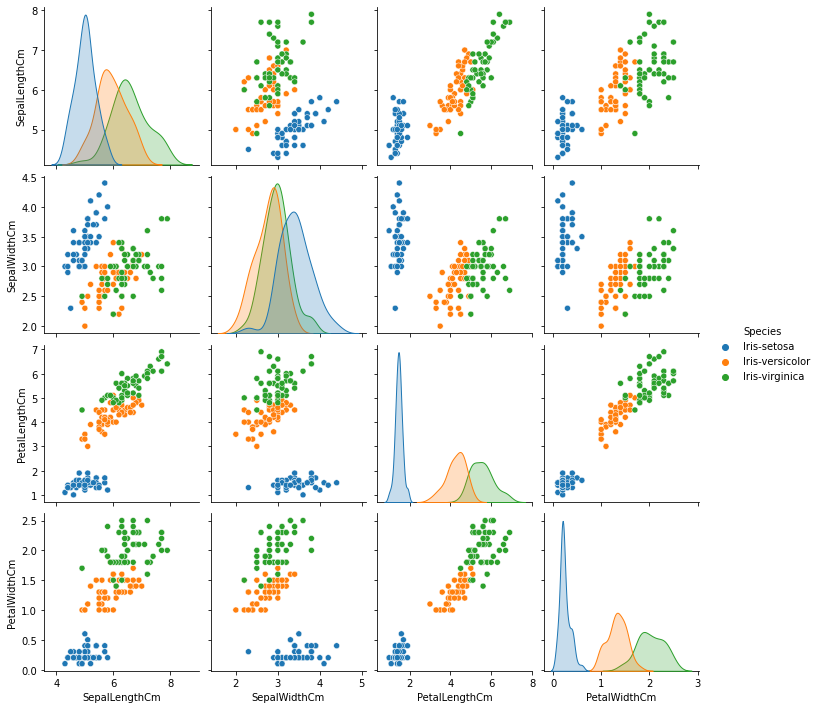

In [26]:
sns.pairplot(data,hue= 'Species')

pairplot are very usefull in understanding the relationships betwwn all pairs of attributes.
we can observe that the clusters of species 'versicolor' and 'virginca' are closely related whereas 'setosa ' is distinct from the other two.

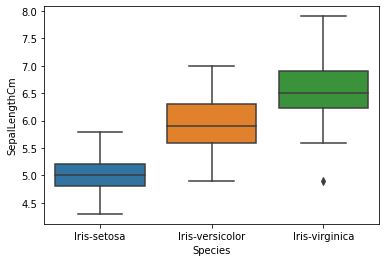

In [32]:
sns.boxplot(x= 'Species', y= 'SepalLengthCm', data= data)

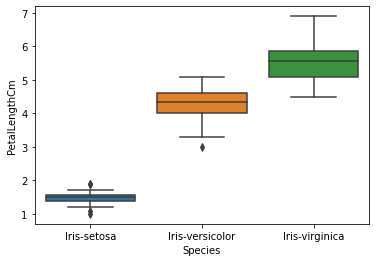

In [33]:
sns.boxplot(x= 'Species', y= 'PetalLengthCm', data= data)

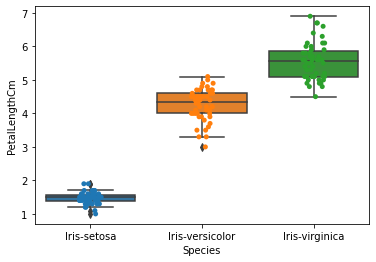

In [35]:
plot= sns.boxplot(x= 'Species', y= 'PetalLengthCm', data= data)
plot=sns.stripplot(x= 'Species', y= 'PetalLengthCm', data= data)

we can plot boxplot using a categorical feature against a continous feature to understand how our data is distributed over different features. here , we have combined a stripplot to identify visible numbers of outliers.

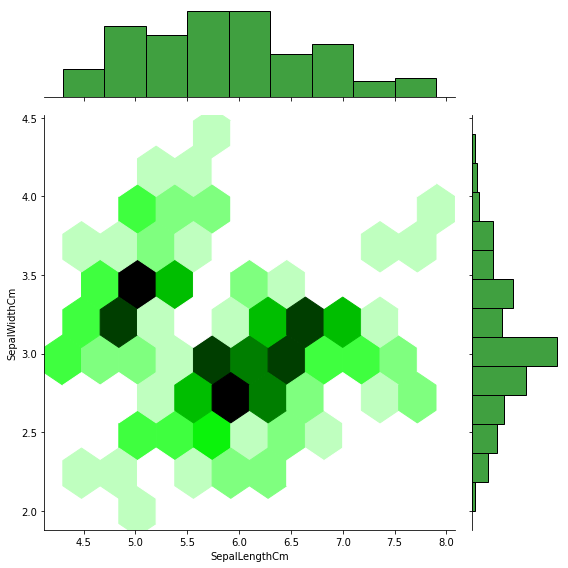

In [37]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=data, height=8,ratio=4,kind='hex', color='green')

from the above joimtplot we can find the major areas of concentration of our data points, the darker heaxagons refer to higher concentration, lighter color heaxagons refers to the lesser concentration.

Shuffling the dataset

In [39]:
data=data.sample(frac=1)
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
18,5.1,3.5,1.4,0.3,Iris-setosa
106,7.6,3.0,6.6,2.1,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica
23,4.6,3.6,1.0,0.2,Iris-setosa
13,4.8,3.0,1.4,0.1,Iris-setosa
28,5.2,3.5,1.5,0.2,Iris-setosa
67,5.6,3.0,4.5,1.5,Iris-versicolor
25,4.8,3.4,1.9,0.2,Iris-setosa


Encoding the taregt data.


In [44]:
pip install scikit-learn


In [49]:
from sklearn.preprocessing import LabelEncoder


In [48]:
label_encode=LabelEncoder()

In [53]:
data['Encoded Species']= label_encode.fit_transform(data['Species'])

In [54]:
data.head(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
Id,,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica,2
18,5.1,3.5,1.4,0.3,Iris-setosa,0
106,7.6,3.0,6.6,2.1,Iris-virginica,2
102,5.8,2.7,5.1,1.9,Iris-virginica,2
23,4.6,3.6,1.0,0.2,Iris-setosa,0
13,4.8,3.0,1.4,0.1,Iris-setosa,0
28,5.2,3.5,1.5,0.2,Iris-setosa,0
67,5.6,3.0,4.5,1.5,Iris-versicolor,1
25,4.8,3.4,1.9,0.2,Iris-setosa,0


Iris-setosa	0,
Iris-versicolor	1,
Iris-virginica	2

converting label column into an array

In [57]:
enc_data= label_encode.fit_transform(data['Species'])
enc_data

array([2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1,
       1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1,
       1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2,
       2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1])

splitting the data

In [58]:
from sklearn.model_selection import train_test_split

In [71]:
x=data.iloc[:,:-2].values
x

array([[6.7, 3. , 5.2, 2.3],
       [5.1, 3.5, 1.4, 0.3],
       [7.6, 3. , 6.6, 2.1],
       [5.8, 2.7, 5.1, 1.9],
       [4.6, 3.6, 1. , 0.2],
       [4.8, 3. , 1.4, 0.1],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [6.1, 3. , 4.9, 1.8],
       [6.3, 3.3, 4.7, 1.6],
       [4.6, 3.1, 1.5, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.3, 2.5, 4.9, 1.5],
       [5.1, 3.3, 1.7, 0.5],
       [5.8, 4. , 1.2, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [6.9, 3.1, 4.9, 1.5],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.7, 5.1, 1.6],
       [5.7, 2.9, 4.2, 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [7.7, 2.8, 6.7, 2. ],
       [5.6, 2.5, 3.9, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [4.9, 2.4, 3.3, 1. ],
       [4.4, 3.2, 1.3, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [7.9, 3.8, 6.4, 2. ],
       [5.6, 3. , 4.1, 1.3],
       [6.5, 3.2, 5.1, 2. ],
       [6.9, 3

In [72]:
x.shape

(150, 4)

In [73]:
y=enc_data
y

array([2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1,
       1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1,
       1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2,
       2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1])

In [74]:
x_train, x_test, y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=100) 

Building the decision tree model, training and predictions

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dtree=DecisionTreeClassifier()

In [77]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [79]:
predictions= dtree.predict(x_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        17
           2       0.89      0.89      0.89         9

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45



In [84]:
print(confusion_matrix(y_test,predictions))

[[19  0  0]
 [ 0 16  1]
 [ 0  1  8]]


testing our model on a random test case

In [85]:
trial=np.array([(7.2,2.6,6.4,1.5)]) ##prediction label should be '2' that is Iris-virginca

In [86]:
pred_trial=dtree.predict(trial)
pred_trial

array([2])

hence the prediction is true.

visualizing the decision tree using graphviz

In [88]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [90]:
features=list(data.columns[:-2])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [92]:
target=list(data.Species.unique())
target

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

In [95]:
from sklearn import tree

[Text(372.0, 747.4499999999999, 'PetalWidthCm <= 0.8\ngini = 0.662\nsamples = 105\nvalue = [31, 33, 41]\nclass = Iris-versicolor'),
 Text(186.0, 611.55, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Iris-virginica'),
 Text(558.0, 611.55, 'PetalWidthCm <= 1.75\ngini = 0.494\nsamples = 74\nvalue = [0, 33, 41]\nclass = Iris-versicolor'),
 Text(372.0, 475.65, 'PetalLengthCm <= 4.95\ngini = 0.193\nsamples = 37\nvalue = [0, 33, 4]\nclass = Iris-setosa'),
 Text(186.0, 339.74999999999994, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = Iris-setosa'),
 Text(558.0, 339.74999999999994, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-versicolor'),
 Text(372.0, 203.8499999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-versicolor'),
 Text(744.0, 203.8499999999999, 'SepalLengthCm <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]\nclass = Iris-setosa'),
 Text(558.0, 67.94999999999993, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\n

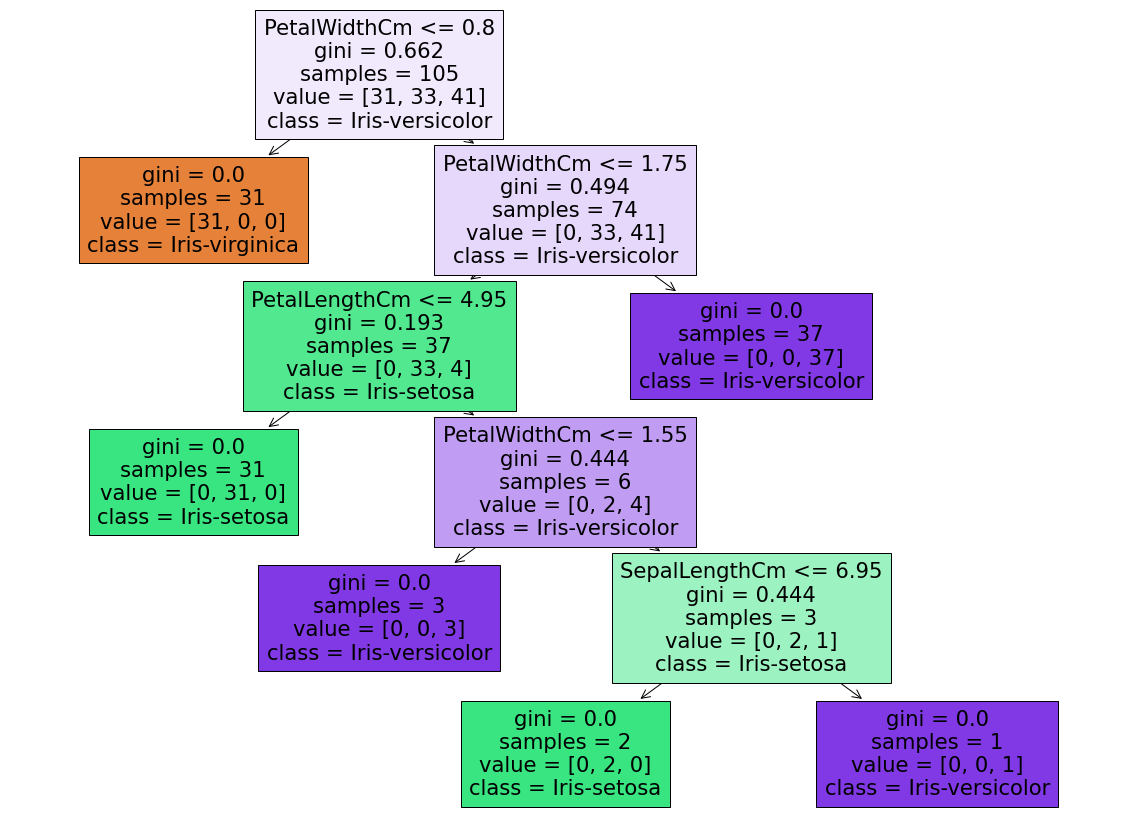

In [100]:
fig= plt.figure(figsize=(20,15))
tree.plot_tree(dtree, feature_names= features, class_names= target, filled=True)